<a href="https://colab.research.google.com/github/Jmontoyaor/Computational-electromagnetics/blob/main/Campos_electromagneticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install streamlit -q
!pip install iapws -q

!pip install streamlit numpy scipy matplotlib yt-dlp pydub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 102.6 MB/s eta 0:00:00


In [2]:
pip install streamlit numpy matplotlib

In [3]:
!mkdir -p pages

PAGINA PRINCIPAL


In [4]:
%%writefile Introducción.py
import streamlit as st

st.set_page_config(
    page_title="Laboratorio Virtual de Electromagnetismo",
    page_icon="⚡",
    layout="wide"
)

st.sidebar.image(
    "https://raw.githubusercontent.com/Jmontoyaor/Computational-electromagnetics/main/Imagenes/Propela_logo.png",
    use_container_width=True
)

custom_css = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@400;700&display=swap');

    .stApp {
        background-color: #0e1a40; /* Fondo de la app */
        color: #E0E0E0; /* Texto principal */
        font-family: 'Poppins', sans-serif;
    }

    h1, h2, h3 {
        color: #00BFFF; /* Títulos */
        font-family: 'Poppins', sans-serif;
    }

    section[data-testid="stSidebar"] {
        background-color: #222f5b !important; /* Sidebar */
        border-radius: 10px;
        font-family: 'Poppins', sans-serif;
    }

    section[data-testid="stSidebar"] * {
        color: #c6e2ff !important; /* Texto del sidebar */
    }
</style>
"""



st.markdown(custom_css, unsafe_allow_html=True)

# --- Title ---
st.title("Laboratorio Virtual de Electromagnetismo: Un Espacio Interactivo de Aprendizaje")
# --- Introduction ---
st.markdown("""
Bienvenido al **Laboratorio Virtual de Electromagnetismo**, un entorno interactivo diseñado para explorar de manera práctica los fenómenos electromagnéticos
a través de simulaciones computacionales y recursos didácticos.

Este proyecto busca integrar el rigor matemático con la experimentación digital, permitiendo que el estudiante
no solo realice cálculos, sino que también comprenda a fondo los principios que rigen el comportamiento del campo eléctrico y magnético en diversas aplicaciones.
""")

# Imagen centrada con descripción
col1, col2, col3 = st.columns([1,2,1])  # proporción para centrar
with col2:
    st.image(
        "https://github.com/Jmontoyaor/Computational-electromagnetics/blob/main/Imagenes/Background%20(2).png?raw=true",
        use_container_width=True,
        caption="Ilustración conceptual de un campo electromagnético"
    )


st.write("---")

# --- Features ---
st.header("¿Qué encontrarás en este laboratorio?")
st.markdown("""
-  **Simulaciones Interactivas:** Modifica parámetros como carga, corriente o geometría y observa en tiempo real cómo cambian los campos eléctricos y magnéticos.

-  **Cálculos Numéricos Asistidos:** Incluye métodos de resolución integral y diferencial para el análisis de cargas, campos y potenciales.

-  **Fundamento Teórico:** Cada módulo se basa en el libro *Electromagnetismo Computacional* del profesor **Julio César García Álvarez**, conectando la teoría con la práctica.

-  **Ejercicios Guiados:** Encuentra ejemplos aplicados y problemas que fortalecen el aprendizaje mediante el uso de herramientas computacionales.
""")

st.write("---")

# --- Reference ---
st.header("Bibliografía y Repositorio")
st.markdown("""
El material de apoyo y los ejercicios fueron basados en el libro:
**Julio César García Álvarez – Electromagnetismo Computacional**

Este libro está disponible en el repositorio institucional de la **Universidad Nacional de Colombia** en el siguiente enlace:
[Repositorio UNAL - Electromagnetismo Computacional](https://bffrepositorio.unal.edu.co/server/api/core/bitstreams/6cf02436-f3f9-4df7-9291-f990a388c846/content)
""")


st.write("---")

# --- Credits ---
st.header("Créditos")
st.markdown("""
Desarrollador: **Juan Fernando Montoya Ortiz**""")
st.markdown(" Asistente virtual: **ChatGPT (OpenAI)**, colaborando en la estructuración y organización del laboratorio virtual.")




Writing Introducción.py


#Carga eléctrica


In [5]:
%%writefile A-Carga_eléctrica.py

import streamlit as st
import matplotlib.pyplot as plt
import numpy as np
import math



st.sidebar.image(
    "https://raw.githubusercontent.com/Jmontoyaor/Computational-electromagnetics/main/Imagenes/Propela_logo.png",
    use_container_width=True
)
# --- Estilos CSS Personalizados ---
custom_css = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@400;700&display=swap');

    .stApp {
        background-color: #0e1a40; /* Fondo de la app */
        color: #E0E0E0; /* Texto principal */
        font-family: 'Poppins', sans-serif;
    }

    h1, h2, h3 {
        color: #00BFFF; /* Títulos */
        font-family: 'Poppins', sans-serif;
    }

    /* --- INICIO DE LA CORRECCIÓN --- */

    /* Esta es la nueva regla que soluciona el problema */
    label {
        color: #E0E0E0 !important; /* Asegura que el texto de los sliders sea visible */
    }

    /* Contenedor principal del expander */
    [data-testid="stExpander"] {
        border: 1px solid #00BFFF !important; /* Borde azul brillante */
        border-radius: 10px;
        background-color: #1c2a59; /* Fondo para el contenido interno */
    }

    /* El encabezado del expander (la parte que estaba blanca) */
    [data-testid="stExpander"] summary {
        background-color: #222f5b !important; /* Fondo del encabezado */
        color: #E0E0E0 !important; /* Color del texto del título */
        border-radius: 10px; /* Redondear esquinas */
    }

    section[data-testid="stSidebar"] {
        background-color: #222f5b;
        border-radius: 10px;
    }

    section[data-testid="stSidebar"] * {
        color: #c6e2ff !important;
    }

    /* Asegurar que el texto del título sea del color correcto */
    [data-testid="stExpander"] summary p {
        color: #E0E0E0 !important;
    }

    /* --- FIN DE LA CORRECCIÓN --- */

</style>
"""



st.markdown(custom_css, unsafe_allow_html=True)



# Se crea una disposición de 2 columnas para la imagen y el título
col_img, col_title = st.columns([0.3, 1]) # Se ajustó la proporción para dar más espacio a la imagen

with col_img:
    # URL corregida para mostrar la imagen directamente desde GitHub
    st.image("https://raw.githubusercontent.com/Jmontoyaor/Computational-electromagnetics/main/Imagenes/Carga_Electrica.png", width=150)

with col_title:
    st.title("Carga Eléctrica")

# --- TEXTO CORREGIDO ---
# Texto actualizado y relevante para el tema de la carga eléctrica
st.markdown("#### Explora cómo se calcula las distancias de las particulas.")

st.write("---")



# --- Sección Teórica: Definición ---
st.header("Sección Teórica - Definición")
st.markdown("""
La carga eléctrica es una propiedad intrínseca de la materia que se manifiesta en fenómenos eléctricos y magnéticos.
Se presenta en dos tipos: **positiva** y **negativa**, asociadas respectivamente al protón y al electrón.

Su unidad de medida en el Sistema Internacional es el **coulomb (C)**, definido como la cantidad de carga que circula en un segundo por un conductor cuando la corriente es de un amperio.
Un coulomb equivale aproximadamente a **6.242 × 10¹⁸ electrones**, mientras que la carga elemental de un electrón es de **–1.602 × 10⁻¹⁹ C**, valor establecido experimentalmente por Robert A. Millikan en 1910.

En electromagnetismo se emplean las letras **Q** y **q** para representar la cantidad de carga eléctrica.
Estas variables permiten describir interacciones entre partículas y constituyen la base para las leyes fundamentales, como la **Ley de Coulomb** y el **campo eléctrico**.

El análisis de partículas cargadas requiere definir su posición en un sistema de coordenadas.
Los más empleados son:

- **Sistema cartesiano (x, y, z):** describe posiciones en un plano o en un espacio tridimensional.
- **Sistema geográfico (latitud, longitud):** utilizado en mapas y superficies terrestres.
- **Sistema esférico (r, φ, θ):** fundamental en física y astronomía, pues describe posiciones mediante una distancia radial y dos ángulos.

Estos marcos de referencia permiten estudiar trayectorias, posiciones y movimientos de partículas cargadas en distintos contextos físicos.
""")

col1, col2, col3 = st.columns([1,2,1])  # Proporción para centrar la imagen
with col2:
    st.image(
        # Esta es la nueva URL de la imagen de los planos
        "https://github.com/Jmontoyaor/Computational-electromagnetics/blob/main/Imagenes/Planos.png?raw=true",
        use_container_width=True,
        # Pie de foto actualizado para la nueva imagen
        caption="Ilustración de los planos de coordenadas"
    )




with st.expander("Ver Enunciado del Ejercicio 2.1 - Distancias entre Partículas", expanded=True):
    st.subheader("Enunciado del Problema")
    st.markdown("""
    Tres partículas A, B y C se encuentran ubicadas en el plano cartesiano en las siguientes coordenadas (expresadas en metros):
    - **Partícula A:** (2, 1.5) m
    - **Partícula B:** (-3, 1.5) m
    - **Partícula C:** (-2, -3) m

    **Se solicita:**
    a) Ubicar gráficamente los tres puntos en el plano de coordenadas XY.

    b) Calcular las distancias entre todos los pares de partículas utilizando la fórmula de distancia euclidiana:
    """)
    st.latex(r"d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}")
    st.markdown("""
    Específicamente calcule:
    - Distancia entre A y B ($d_{AB}$)
    - Distancia entre A y C ($d_{AC}$)
    - Distancia entre B y C ($d_{BC}$)

    c) Elaborar un segundo gráfico que muestre las distancias como segmentos de línea.

    d) Mostrar todos los cálculos paso a paso.

    e) Presentar los resultados finales en metros con dos decimales.
    """)

# (El código anterior: CSS, Título y Sección Teórica permanece igual)
# ...

# --- PARÁMETROS DE ENTRADA (AHORA EN LA PÁGINA PRINCIPAL) ---
st.header("Parámetros de Entrada")
st.markdown("Define las coordenadas para cada punto usando los sliders.")

# Crear tres columnas para los controles
col_a, col_b, col_c = st.columns(3)

# Entradas para el Punto A en la primera columna
with col_a:
    st.subheader("Punto A")
    ax_coord = st.slider('Coordenada X de A', min_value=-10.0, max_value=10.0, value=2.0, step=0.1, format="%.2f", key="ax")
    ay_coord = st.slider('Coordenada Y de A', min_value=-10.0, max_value=10.0, value=1.5, step=0.1, format="%.2f", key="ay")
A = (ax_coord, ay_coord)

# Entradas para el Punto B en la segunda columna
with col_b:
    st.subheader("Punto B")
    bx_coord = st.slider('Coordenada X de B', min_value=-10.0, max_value=10.0, value=-3.0, step=0.1, format="%.2f", key="bx")
    by_coord = st.slider('Coordenada Y de B', min_value=-10.0, max_value=10.0, value=1.5, step=0.1, format="%.2f", key="by")
B = (bx_coord, by_coord)

# Entradas para el Punto C en la tercera columna
with col_c:
    st.subheader("Punto C")
    cx_coord = st.slider('Coordenada X de C', min_value=-10.0, max_value=10.0, value=-2.0, step=0.1, format="%.2f", key="cx")
    cy_coord = st.slider('Coordenada Y de C', min_value=-10.0, max_value=10.0, value=-3.0, step=0.1, format="%.2f", key="cy")
C = (cx_coord, cy_coord)


# --- CÁLCULOS ---
# (El resto del código: Cálculos, Visualización, etc. permanece igual)
# ...
# --- CÁLCULOS ---
# Función para calcular la distancia euclidiana
def calcular_distancia(p1, p2):
    return math.sqrt((p2[0] - p1[0])**2 + (p2[1] - p1[1])**2)

# Calcular distancias
dist_AB = calcular_distancia(A, B)
dist_AC = calcular_distancia(A, C)
dist_BC = calcular_distancia(B, C)

# --- VISUALIZACIÓN GRÁFICA ---
st.header("📊 Visualización Gráfica")
col1, col2 = st.columns(2)

# Determinar límites dinámicos para los gráficos para que siempre se vean bien
all_x = [A[0], B[0], C[0], 0]
all_y = [A[1], B[1], C[1], 0]
x_min, x_max = min(all_x) - 1, max(all_x) + 1
y_min, y_max = min(all_y) - 1, max(all_y) + 1

# Gráfico 1: Ubicación de puntos
with col1:
    st.subheader("a. Ubicación de puntos")
    fig1, ax1 = plt.subplots(figsize=(6, 5))
    ax1.set_xlim(x_min, x_max)
    ax1.set_ylim(y_min, y_max)
    ax1.grid(True, alpha=0.3)
    ax1.axhline(y=0, color='k', linewidth=0.8)
    ax1.axvline(x=0, color='k', linewidth=0.8)

    # Plotear y anotar puntos
    for point, name in [(A, 'A'), (B, 'B'), (C, 'C')]:
        ax1.plot(point[0], point[1], 'ro', markersize=6)
        ax1.annotate(f'{name}=({point[0]:.2f}, {point[1]:.2f})', xy=point, xytext=(point[0] + 0.1, point[1] + 0.1), fontsize=9, color='red')
        ax1.plot([point[0], point[0]], [0, point[1]], 'k--', alpha=0.5, linewidth=0.8)
        ax1.plot([0, point[0]], [point[1], point[1]], 'k--', alpha=0.5, linewidth=0.8)

    ax1.set_xlabel('Eje X')
    ax1.set_ylabel('Eje Y')
    ax1.set_title('Ubicación en el Plano Cartesiano')
    st.pyplot(fig1)

# Gráfico 2: Trazo de distancias
with col2:
    st.subheader("b. Trazo de distancias")
    fig2, ax2 = plt.subplots(figsize=(6, 5))
    ax2.set_xlim(x_min, x_max)
    ax2.set_ylim(y_min, y_max)
    ax2.grid(True, alpha=0.3)
    ax2.axhline(y=0, color='k', linewidth=0.8)
    ax2.axvline(x=0, color='k', linewidth=0.8)

    # Plotear puntos y anotar
    for point, name in [(A, 'A'), (B, 'B'), (C, 'C')]:
        ax2.plot(point[0], point[1], 'ro', markersize=6)
        ax2.annotate(f'{name}=({point[0]:.2f}, {point[1]:.2f})', xy=point, xytext=(point[0] + 0.1, point[1] + 0.1), fontsize=9, color='red')

    # Dibujar las líneas de distancia
    ax2.plot([A[0], B[0]], [A[1], B[1]], 'b-', linewidth=2, label=f'AB = {dist_AB:.2f}')
    ax2.plot([A[0], C[0]], [A[1], C[1]], 'g-', linewidth=2, label=f'AC = {dist_AC:.2f}')
    ax2.plot([B[0], C[0]], [B[1], C[1]], 'm-', linewidth=2, label=f'BC = {dist_BC:.2f}')
    ax2.legend()

    ax2.set_xlabel('Eje X')
    ax2.set_ylabel('Eje Y')
    ax2.set_title('Distancias entre Puntos')
    st.pyplot(fig2)

# --- CÁLCULOS DETALLADOS ---
st.header("Cálculos de Distancias")
st.markdown("A continuación se muestra el cálculo paso a paso para cada distancia, utilizando la fórmula de la distancia euclidiana:")
st.latex(r"d = \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}")

with st.expander("Distancia AB"):
    st.latex(fr"d(A,B) = \sqrt{{({B[0]:.2f} - {A[0]:.2f})^2 + ({B[1]:.2f} - {A[1]:.2f})^2}}")
    st.latex(fr"d(A,B) = \sqrt{{({B[0] - A[0]:.2f})^2 + ({B[1] - A[1]:.2f})^2}}")
    st.latex(fr"d(A,B) = \sqrt{{{ (B[0] - A[0])**2:.2f} + { (B[1] - A[1])**2:.2f} }}")
    st.latex(fr"d(A,B) = \sqrt{{{ (B[0] - A[0])**2 + (B[1] - A[1])**2:.2f} }}")
    st.success(f"**Distancia AB = {dist_AB:.2f}**")

with st.expander("Distancia AC"):
    st.latex(fr"d(A,C) = \sqrt{{({C[0]:.2f} - {A[0]:.2f})^2 + ({C[1]:.2f} - {A[1]:.2f})^2}}")
    st.latex(fr"d(A,C) = \sqrt{{({C[0] - A[0]:.2f})^2 + ({C[1] - A[1]:.2f})^2}}")
    st.latex(fr"d(A,C) = \sqrt{{{ (C[0] - A[0])**2:.2f} + { (C[1] - A[1])**2:.2f} }}")
    st.latex(fr"d(A,C) = \sqrt{{{ (C[0] - A[0])**2 + (C[1] - A[1])**2:.2f} }}")
    st.success(f"**Distancia AC = {dist_AC:.2f}**")

with st.expander("Distancia BC"):
    st.latex(fr"d(B,C) = \sqrt{{({C[0]:.2f} - {B[0]:.2f})^2 + ({C[1]:.2f} - {B[1]:.2f})^2}}")
    st.latex(fr"d(B,C) = \sqrt{{({C[0] - B[0]:.2f})^2 + ({C[1] - B[1]:.2f})^2}}")
    st.latex(fr"d(B,C) = \sqrt{{{ (C[0] - B[0])**2:.2f} + { (C[1] - B[1])**2:.2f} }}")
    st.latex(fr"d(B,C) = \sqrt{{{ (C[0] - B[0])**2 + (C[1] - B[1])**2:.2f} }}")
    st.success(f"**Distancia BC = {dist_BC:.2f}**")

st.info(
    """
    **Este ejercicio demuestra:**
    1.  La ubicación de puntos en el plano cartesiano.
    2.  El cálculo de distancias entre puntos usando la fórmula euclidiana.
    3.  La visualización gráfica de las distancias como segmentos de línea.
    """
)

Writing A-Carga_eléctrica.py


In [6]:
!mv A-Carga_eléctrica.py pages/

#Campo_eléctrico


In [7]:
%%writefile B-Campo_eléctrico.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt


# --- CONFIGURACIÓN DE LA BARRA LATERAL Y ESTILOS ---
st.set_page_config(layout="wide", page_title="Campo Eléctrico")

st.sidebar.image(
    "https://raw.githubusercontent.com/Jmontoyaor/Computational-electromagnetics/main/Imagenes/Propela_logo.png",
    use_container_width=True
)

custom_css = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@400;700&display=swap');

    .stApp {
        background-color: #0e1a40; /* Fondo de la app */
        color: #E0E0E0; /* Texto principal */
        font-family: 'Poppins', sans-serif;
    }

    h1, h2, h3 {
        color: #00BFFF; /* Títulos */
        font-family: 'Poppins', sans-serif;
    }

    /* --- INICIO DE LA CORRECCIÓN --- */

    /* Esta es la nueva regla que soluciona el problema */
    label {
        color: #E0E0E0 !important; /* Asegura que el texto de los sliders sea visible */
    }

    /* Contenedor principal del expander */
    [data-testid="stExpander"] {
        border: 1px solid #00BFFF !important; /* Borde azul brillante */
        border-radius: 10px;
        background-color: #1c2a59; /* Fondo para el contenido interno */
    }

    /* El encabezado del expander (la parte que estaba blanca) */
    [data-testid="stExpander"] summary {
        background-color: #222f5b !important; /* Fondo del encabezado */
        color: #E0E0E0 !important; /* Color del texto del título */
        border-radius: 10px; /* Redondear esquinas */
    }

    section[data-testid="stSidebar"] {
        background-color: #222f5b;
        border-radius: 10px;
    }

    section[data-testid="stSidebar"] * {
        color: #c6e2ff !important;
    }

    /* Asegurar que el texto del título sea del color correcto */
    [data-testid="stExpander"] summary p {
        color: #E0E0E0 !important;
    }

    /* --- FIN DE LA CORRECCIÓN --- */

</style>
"""
st.markdown(custom_css, unsafe_allow_html=True)

# --- ENCABEZADO DE LA PÁGINA ---
col_img, col_title = st.columns([0.2, 1])

with col_img:
    # URL actualizada a una imagen más relevante para el tema
    st.image("https://raw.githubusercontent.com/Jmontoyaor/Computational-electromagnetics/main/Imagenes/Distribucci%C3%B3n.png", width=150)

with col_title:
    st.title("Campo Eléctrico")

# Texto introductorio actualizado
st.markdown("#### Descubre qué es un campo eléctrico, cómo se representa en el espacio-tiempo y cómo se calcula su intensidad.")
st.write("---")

# --- CUERPO TEÓRICO ---
st.header("Fundamentos Teóricos del Campo Eléctrico")

# Subsección 1: Concepto
st.subheader("1. Concepto de Campo Eléctrico")
st.markdown(r"""
El **campo eléctrico** es una magnitud vectorial que describe la interacción a distancia entre cuerpos cargados. Se define como la fuerza ($\vec{F}$) que experimenta una carga de prueba positiva ($q$) al colocarse en un punto del espacio, dividida por el valor de dicha carga.
""")
st.latex(r"\vec{E} = \frac{\vec{F}}{q}")
st.markdown("""
Su naturaleza vectorial implica que en cada punto del espacio se asigna un vector que indica la dirección y el sentido de la fuerza que actuaría sobre una carga positiva.
""")

# Subsección 2: Ubicación Espacio-Temporal
st.subheader("2. Ubicación Espacio-Temporal en un Campo")
st.markdown("""
La descripción de un campo no solo depende del espacio, sino también del tiempo. Un campo puede clasificarse en:
- **Campo estático:** Solo varía en el espacio, es constante en el tiempo.
- **Campo dinámico:** Varía tanto en el espacio como en el tiempo, modelando fenómenos como las ondas electromagnéticas.

La ubicación espacio-temporal de un campo eléctrico se expresa como una función vectorial de las cuatro variables (x, y, z, t):
""")
st.latex(r"\vec{E} = \vec{E}(x,y,z,t)")

# Subsección 3: Intensidad
st.subheader("3. Intensidad de Campo Eléctrico")
st.markdown(r"""
La intensidad del campo eléctrico cuantifica la magnitud de la fuerza que una carga fuente ($Q$) ejerce en un punto del espacio. Este concepto se basa en la **Ley de Coulomb**.

La expresión para el campo eléctrico generado por una carga puntual es:
""")
st.latex(r"\vec{E} = \frac{1}{4\pi \epsilon_0} \frac{Q}{|\vec{r}|^2} \hat{r}")
st.markdown(r"""
Donde:
- **$Q$** es la carga fuente.
- **$\vec{r}$** es el vector de posición desde la carga fuente al punto de observación.
- **$\hat{r}$** es el vector unitario en la dirección de $\vec{r}$.
- **$\epsilon_0$** es la permitividad eléctrica del vacío.
""")


# --- Constante de Coulomb ---
k = 8.987e9  # N·m²/C²

# --- Función para calcular el campo eléctrico de una carga puntual ---
def campo_electrico_punto(q, r_carga, r_eval):
    r_vec = r_eval - r_carga
    r_mag = np.linalg.norm(r_vec)
    if r_mag < 1e-6:
        return np.array([0, 0])
    r_unit = r_vec / r_mag
    return k * q * r_unit / r_mag**2

# --- Interfaz en Streamlit ---
st.title("⚡ Visualización del Campo Eléctrico con 3 Cargas Puntuales")

st.header("🔧 Parámetros de las cargas")

# Tres columnas para las tres cargas
col1, col2, col3 = st.columns(3)
cargas = []

for i, col in enumerate([col1, col2, col3]):
    with col:
        st.subheader(f"Carga {i+1}")
        q = st.slider(f"q{i+1} (nC)", -5.0, 5.0, 1.0, step=0.1, key=f"q{i}")
        x = st.slider(f"x{i+1} (m)", -6.0, 6.0, float(i*2 - 2), step=0.1, key=f"x{i}")
        y = st.slider(f"y{i+1} (m)", -6.0, 6.0, float(i - 1), step=0.1, key=f"y{i}")
        cargas.append({'q': q*1e-9, 'pos': np.array([x, y])})


# --- Preparación de la malla ---
nx, ny = 40, 40
x = np.linspace(-6, 6, nx)
y = np.linspace(-6, 6, ny)
X, Y = np.meshgrid(x, y)

Ex, Ey = np.zeros(X.shape), np.zeros(Y.shape)

# --- Cálculo del campo ---
for i in range(nx):
    for j in range(ny):
        punto_eval = np.array([X[i, j], Y[i, j]])
        E_total = np.array([0.0, 0.0])
        for carga in cargas:
            E_total += campo_electrico_punto(carga['q'], carga['pos'], punto_eval)
        Ex[i, j] = E_total[0]
        Ey[i, j] = E_total[1]

# --- Visualización ---
fig, ax = plt.subplots(figsize=(8, 8))

magnitud = np.sqrt(Ex**2 + Ey**2)
Ex_norm = Ex / magnitud
Ey_norm = Ey / magnitud

quiver = ax.quiver(X, Y, Ex_norm, Ey_norm, magnitud, cmap='viridis', scale=40)
plt.colorbar(quiver, ax=ax, label='Magnitud del Campo Eléctrico (N/C)')

# Dibujar cargas
for carga in cargas:
    color = 'blue' if carga['q'] > 0 else 'red'
    ax.scatter(carga['pos'][0], carga['pos'][1], color=color, s=150, zorder=5, edgecolors='white')
    ax.text(carga['pos'][0] + 0.2, carga['pos'][1] + 0.2, f'{carga["q"]*1e9:.1f} nC', fontsize=10)

ax.set_title('Campo Eléctrico de Cargas Puntuales')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.axis('equal')
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.grid(True, linestyle=':', alpha=0.6)

st.pyplot(fig)


Writing B-Campo_eléctrico.py


In [8]:
!mv B-Campo_eléctrico.py pages/



#Campo_magnetostático

In [39]:
%%writefile C-Campo_magnetostático.py
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt


# --- CONFIGURACIÓN DE LA BARRA LATERAL Y ESTILOS ---
st.set_page_config(layout="wide", page_title="Campo Eléctrico")

st.sidebar.image(
    "https://raw.githubusercontent.com/Jmontoyaor/Computational-electromagnetics/main/Imagenes/Propela_logo.png",
    use_container_width=True
)

custom_css = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@400;700&display=swap');

    .stApp {
        background-color: #0e1a40; /* Fondo de la app */
        color: #E0E0E0; /* Texto principal */
        font-family: 'Poppins', sans-serif;
    }

    h1, h2, h3 {
        color: #00BFFF; /* Títulos */
        font-family: 'Poppins', sans-serif;
    }

    /* --- INICIO DE LA CORRECCIÓN --- */

    /* Esta es la nueva regla que soluciona el problema */
    label {
        color: #E0E0E0 !important; /* Asegura que el texto de los sliders sea visible */
    }

    /* Contenedor principal del expander */
    [data-testid="stExpander"] {
        border: 1px solid #00BFFF !important; /* Borde azul brillante */
        border-radius: 10px;
        background-color: #1c2a59; /* Fondo para el contenido interno */
    }

    /* El encabezado del expander (la parte que estaba blanca) */
    [data-testid="stExpander"] summary {
        background-color: #222f5b !important; /* Fondo del encabezado */
        color: #E0E0E0 !important; /* Color del texto del título */
        border-radius: 10px; /* Redondear esquinas */
    }

    section[data-testid="stSidebar"] {
        background-color: #222f5b;
        border-radius: 10px;
    }

    section[data-testid="stSidebar"] * {
        color: #c6e2ff !important;
    }

    /* Asegurar que el texto del título sea del color correcto */
    [data-testid="stExpander"] summary p {
        color: #E0E0E0 !important;
    }

    /* --- FIN DE LA CORRECCIÓN --- */

</style>
"""
st.markdown(custom_css, unsafe_allow_html=True)

# --- ENCABEZADO DE LA PÁGINA ---
col_img, col_title = st.columns([0.2, 1])

with col_img:
    # URL actualizada a una imagen más relevante para el tema
    st.image("https://raw.githubusercontent.com/Jmontoyaor/Computational-electromagnetics/main/Imagenes/Campo.png", width=150)

with col_title:
    st.title("Campo Magnestostático")


# --- CUERPO TEÓRICO ---
st.header("Fundamentos Teóricos del Campo Magnetostático")

# 1. Concepto
with st.container():
    st.subheader("1. Concepto de Campo Magnetostático")
    st.markdown(r"""
    El **campo magnetostático** se origina cuando las **cargas eléctricas están en movimiento**,
    es decir, debido a corrientes eléctricas.
    Fue descubierto por **Hans Christian Ørsted (1820)**, quien observó que una corriente
    eléctrica desviaba la aguja de una brújula.

    El campo magnético se representa con el vector **densidad de flujo magnético** $\vec{B}$,
    que es **perpendicular** a la corriente que lo genera.
    """)

# 2. Ley de Biot-Savart
with st.container():
    st.subheader("2. Ley de Biot-Savart")
    st.markdown(r"""
    Formulada por **Biot y Savart (1820)**, describe la contribución al campo magnético de
    un **elemento de corriente** en un punto del espacio:
    """)
    st.latex(r"d\vec{B} = \frac{\mu_0}{4\pi} \frac{ I \, d\vec{l} \times \hat{a}_R }{R^2}")
    st.markdown(r"""
    Donde:
    - $\mu_0$ = permeabilidad magnética del vacío
    - $I$ = corriente eléctrica
    - $d\vec{l}$ = vector tangente al conductor
    - $\hat{a}_R$ = vector unitario hacia el punto de observación
    - $R$ = distancia al punto

     Es análoga a la **ley de Coulomb** para el campo eléctrico, pero aplicada a corrientes.
    """)

# 3. Regla de la mano derecha
with st.container():
    st.subheader("3. Regla de la Mano Derecha")
    st.markdown(r"""
    La dirección del campo magnético $\vec{B}$ se obtiene con la **regla de la mano derecha**:
    - Dedos → dirección de la corriente $I$
    - Pulgar → dirección del campo magnético $\vec{B}$
    """)

# 4. Campo total
with st.container():
    st.subheader("4. Campo Magnético Total")
    st.markdown(r"""
    Para obtener el campo en un punto se integra la contribución de todos los elementos de corriente:
    """)
    st.latex(r"\vec{B}(x,y,z) = \frac{\mu_0 I}{4\pi} \int_{L} \frac{ d\vec{l} \times \hat{a}_R }{R^2}")

# 5. Unidades
with st.container():
    st.subheader("5. Unidades del Campo Magnético")
    st.markdown(r"""
    - **Tesla (T)** = $\text{N} / (\text{A} \cdot \text{m})$
    - **Weber por metro cuadrado** ($\text{Wb/m}^2$)
    - **Gauss (G)**, con $1 \, \text{T} = 10^4 \, \text{G}$
    """)

# 6. Ejemplos
with st.container():
    st.subheader("6. Ejemplos Importantes")
    st.markdown(r"""
    - Cable conductor recto → el campo disminuye con la distancia
    - Varios cables paralelos → se aplica superposición
    - Espira circular → genera un campo en su eje
    """)

# 7. Ley de Gauss
with st.container():
    st.subheader("7. Ley de Gauss para el Magnetismo")
    st.markdown(r"""
    Explica una propiedad fundamental del campo magnético:
    """)
    st.latex(r"\Phi_M = \iint_{S} \vec{B} \cdot d\vec{s} = 0")
    st.markdown(r"""
    Es decir:
    - El flujo magnético neto a través de una superficie cerrada siempre es **cero**
    - No existen monopolos magnéticos
    - Las líneas de campo magnético son siempre **cerradas**, salen de un polo y entran en el otro
    """)


st.title("Campo Magnético de un Conductor Infinito Desplazado")

st.markdown("""
Este simulador muestra el campo magnético **H** alrededor de un conductor infinito con corriente
en la dirección **+z**.
Ahora puedes mover el conductor en el plano XY y observar cómo cambia el campo.
""")

# --- Parámetros controlados por el usuario ---
I = st.slider("Corriente (A)", min_value=-10.0, max_value=10.0, value=5.0, step=1.0)
x0 = st.slider("Posición X del conductor", -5.0, 5.0, 0.0, 0.1)
y0 = st.slider("Posición Y del conductor", -5.0, 5.0, 0.0, 0.1)

plotlim = [-5, 5, -5, 5]

# --- Malla ---
dx = (plotlim[1] - plotlim[0]) / 20
dy = (plotlim[3] - plotlim[2]) / 20
xrange = np.arange(plotlim[0], plotlim[1] + dx, dx)
yrange = np.arange(plotlim[2], plotlim[3] + dy, dy)
X, Y = np.meshgrid(xrange, yrange)

# --- Distancia radial al nuevo centro ---
R = np.sqrt((X - x0)**2 + (Y - y0)**2)
R[R == 0] = np.nan  # evitar división por cero

# Vectores unitarios en dirección phi (-Δy, Δx)
phiX = -(Y - y0) / R
phiY =  (X - x0) / R

# --- Campo magnético ---
H = I / (2 * np.pi * R)
U = H * phiX
V = H * phiY

# --- Graficar ---
fig, ax = plt.subplots(figsize=(6,6))
ax.quiver(X, Y, U, V, color="blue")
ax.set_aspect("equal")
ax.set_xlim(plotlim[0], plotlim[1])
ax.set_ylim(plotlim[2], plotlim[3])
ax.set_xlabel("X location (m)")
ax.set_ylabel("Y location (m)")
ax.set_title(f"Campo Magnético para I = {I:.1f} A, Conductor en ({x0:.1f}, {y0:.1f})")
ax.grid(True)

# Dibujar la posición del conductor
ax.plot(x0, y0, "ro", markersize=10, label="Conductor")
ax.legend()

st.pyplot(fig)




Writing C-Campo_magnetostático.py


In [40]:
!mv C-Campo_magnetostático.py pages/

#Quizz

In [33]:
%%writefile D-Quizz.py
import streamlit as st
import json
from typing import Dict, List

# --- CONFIGURACIÓN DE PÁGINA Y ESTILOS ---
st.set_page_config(
    layout="wide",
    page_title="Quiz de Electromagnetismo",
    page_icon="🤖"
)

# CSS personalizado con tu paleta de colores preferida
custom_css = """
<style>
    @import url('https://fonts.googleapis.com/css2?family=Poppins:wght@400;500;600;700&display=swap');

    .stApp {
        background-color: #0e1a40;
        color: #E0E0E0;
        font-family: 'Poppins', sans-serif;
    }

    h1, h2, h3 {
        color: #00BFFF;
        font-family: 'Poppins', sans-serif;
    }

    section[data-testid="stSidebar"] {
        background-color: #222f5b !important;
        border-radius: 10px;
        font-family: 'Poppins', sans-serif;
    }

    section[data-testid="stSidebar"] * {
        color: #c6e2ff !important;
    }

    .main-header {
        text-align: center;
        padding: 2rem 0;
        background: linear-gradient(135deg, #222f5b, #0e1a40);
        backdrop-filter: blur(10px);
        border-radius: 20px;
        margin-bottom: 2rem;
        border: 2px solid #00BFFF;
        box-shadow: 0 8px 32px 0 rgba(0, 191, 255, 0.2);
    }

    .quiz-container {
        background: linear-gradient(135deg, rgba(34, 47, 91, 0.8), rgba(14, 26, 64, 0.9));
        backdrop-filter: blur(15px);
        border-radius: 15px;
        padding: 2rem;
        margin: 1rem 0;
        border: 1px solid rgba(0, 191, 255, 0.3);
        box-shadow: 0 8px 32px 0 rgba(0, 191, 255, 0.1);
    }

    .question-number {
        background: linear-gradient(45deg, #00BFFF, #222f5b);
        color: white;
        padding: 0.5rem 1rem;
        border-radius: 25px;
        font-weight: 600;
        display: inline-block;
        margin-bottom: 1rem;
        box-shadow: 0 4px 15px rgba(0, 191, 255, 0.3);
    }

    .stRadio > div {
        background: rgba(34, 47, 91, 0.4);
        padding: 1rem;
        border-radius: 10px;
        border: 1px solid rgba(0, 191, 255, 0.2);
        color: #ffffff !important;
    }

    .stRadio > div > label {
        color: #ffffff !important;
    }

    .stRadio > div > label > div {
        color: #ffffff !important;
    }

    .stRadio label {
        color: #ffffff !important;
    }

    /* Asegurar que todas las opciones de radio sean blancas */
    div[data-testid="stRadio"] label span {
        color: #ffffff !important;
    }

    div[data-testid="stRadio"] > div > label {
        color: #ffffff !important;
    }

    .result-correct {
        background: linear-gradient(45deg, #00BFFF, #222f5b);
        color: white;
        padding: 1rem;
        border-radius: 10px;
        margin: 1rem 0;
        font-weight: 500;
        box-shadow: 0 4px 15px rgba(0, 191, 255, 0.3);
    }

    .result-incorrect {
        background: linear-gradient(45deg, #ff4757, #222f5b);
        color: white;
        padding: 1rem;
        border-radius: 10px;
        margin: 1rem 0;
        font-weight: 500;
        box-shadow: 0 4px 15px rgba(255, 71, 87, 0.3);
    }

    .hint-box {
        background: rgba(34, 47, 91, 0.6);
        border-left: 4px solid #00BFFF;
        padding: 1rem;
        border-radius: 5px;
        margin: 1rem 0;
        font-style: italic;
        color: #c6e2ff;
    }

    .score-container {
        text-align: center;
        background: linear-gradient(135deg, #222f5b, #00BFFF);
        padding: 2rem;
        border-radius: 15px;
        margin: 2rem 0;
        box-shadow: 0 8px 32px 0 rgba(0, 191, 255, 0.4);
        border: 2px solid rgba(0, 191, 255, 0.5);
    }

    .stButton > button {
        background: linear-gradient(45deg, #00BFFF, #222f5b);
        color: white;
        border: none;
        border-radius: 25px;
        padding: 0.5rem 2rem;
        font-weight: 600;
        transition: all 0.3s ease;
        box-shadow: 0 4px 15px rgba(0, 191, 255, 0.3);
    }

    .stButton > button:hover {
        transform: translateY(-2px);
        box-shadow: 0 6px 20px rgba(0, 191, 255, 0.4);
        background: linear-gradient(45deg, #0099cc, #1a2547);
    }

    .stProgress > div > div > div {
        background: linear-gradient(90deg, #00BFFF, #222f5b);
    }

    .stMetric {
        background: rgba(34, 47, 91, 0.6);
        padding: 1rem;
        border-radius: 10px;
        border: 1px solid rgba(0, 191, 255, 0.2);
    }

    .stExpander {
        background: rgba(34, 47, 91, 0.4);
        border: 1px solid rgba(0, 191, 255, 0.2);
        border-radius: 10px;
    }
</style>
"""

st.markdown(custom_css, unsafe_allow_html=True)

# --- DATOS DEL QUIZ ---
quiz_data = {
    "title": "⚡ Quiz de Electromagnetismo Computacional",
    "description": "Pon a prueba tus conocimientos sobre campos eléctricos, densidades de carga y fundamentos de electrostática y modelado computacional.",
    "questions": [
        {
            "id": 1,
            "question": "¿Qué nombre recibe la técnica numérica que aproxima integrales mediante áreas de trapecios?",
            "options": [
                "Regla de Simpson",
                "Regla del trapecio",
                "Método de Newton",
                "Serie de Taylor"
            ],
            "correct_answer": 1,
            "explanation": "La regla del trapecio aproxima integrales sumando áreas de trapecios formados en subintervalos iguales.",
            "hint": "Piensa en dividir el área bajo la curva en figuras simples."
        },
        {
            "id": 2,
            "question": "Si un cuerpo tiene equilibrio a lo largo de una línea cargada, ¿qué densidad de carga se usa?",
            "options": [
                "Densidad superficial de carga (σ)",
                "Densidad volumétrica de carga (ρ)",
                "Densidad lineal de carga (λ)",
                "Densidad angular de carga"
            ],
            "correct_answer": 2,
            "explanation": "Para cargas distribuidas en una línea, se usa la densidad lineal de carga λ = Q/L.",
            "hint": "Carga dividida entre longitud."
        },
        {
            "id": 3,
            "question": "¿Cuál de los siguientes es un ejemplo de campo escalar?",
            "options": [
                "La velocidad del viento en un punto",
                "La temperatura en una ciudad",
                "La fuerza sobre una partícula",
                "El campo eléctrico en un punto"
            ],
            "correct_answer": 1,
            "explanation": "La temperatura asigna un valor único (escalar) en cada punto del espacio.",
            "hint": "No tiene dirección, solo magnitud."
        },
        {
            "id": 4,
            "question": "El modelo microscópico en electromagnetismo computacional se basa en:",
            "options": [
                "Ignorar cargas y modelar solo campos.",
                "Considerar cargas individuales e interacciones mediante leyes como Coulomb, Gauss, Faraday y Ampère.",
                "Explicar sin electrones ni protones.",
                "Usar solo aproximaciones macroscópicas."
            ],
            "correct_answer": 1,
            "explanation": "El modelo microscópico describe el campo desde partículas y leyes fundamentales.",
            "hint": "Parte desde cargas elementales y sus interacciones."
        },
        {
            "id": 5,
            "question": "¿Cómo se denomina la magnitud de carga eléctrica por unidad de volumen?",
            "options": [
                "Densidad lineal de carga (λ)",
                "Densidad superficial de carga (σ)",
                "Densidad volumétrica de carga (ρ)",
                "Intensidad de campo eléctrico"
            ],
            "correct_answer": 2,
            "explanation": "La densidad volumétrica es ρ = Q/V, en [C/m³].",
            "hint": "Se mide respecto al espacio tridimensional."
        },
        {
            "id": 6,
            "question": "¿Qué se entiende por electricidad estática o electrostática?",
            "options": [
                "Estudio de cargas en movimiento",
                "Estudio de campos magnéticos en reposo",
                "Estudio de cargas en reposo y sus interacciones",
                "Estudio de ondas electromagnéticas"
            ],
            "correct_answer": 2,
            "explanation": "La electrostática estudia cargas en reposo y los campos que generan.",
            "hint": "No hay movimiento de cargas."
        },
        {
            "id": 7,
            "question": "Relaciona cada densidad de carga con su fórmula correcta:",
            "options": [
                "λ = Q/L  [C/m]",
                "σ = Q/S  [C/m²]",
                "ρ = Q/V  [C/m³]",
                "Todas las anteriores"
            ],
            "correct_answer": 3,
            "explanation": "Las tres son correctas: lineal (λ), superficial (σ) y volumétrica (ρ).",
            "hint": "Cada tipo depende de la dimensión de la región cargada."
        }
    ]
}


# --- INICIALIZACIÓN DEL ESTADO ---
if 'current_question' not in st.session_state:
    st.session_state.current_question = 0
if 'answers' not in st.session_state:
    st.session_state.answers = {}
if 'show_results' not in st.session_state:
    st.session_state.show_results = False
if 'quiz_completed' not in st.session_state:
    st.session_state.quiz_completed = False

# --- FUNCIONES AUXILIARES ---
def reset_quiz():
    st.session_state.current_question = 0
    st.session_state.answers = {}
    st.session_state.show_results = False
    st.session_state.quiz_completed = False

def calculate_score():
    correct = 0
    total = len(quiz_data['questions'])
    for q_id, answer in st.session_state.answers.items():
        question = next(q for q in quiz_data['questions'] if q['id'] == q_id)
        if answer == question['correct_answer']:
            correct += 1
    return correct, total

# --- HEADER ---
st.markdown("""
<div class="main-header">
    <h1>🧑‍💻 Quiz de Electromagnetismo</h1>
    <h3>🧠 Electromagnetismo computacional</h3>
    <p>Pon a prueba tus conocimientos sobre campos eléctricos, densidades de carga y fundamentos de electrostática y modelado computacional</p>
</div>
""", unsafe_allow_html=True)

# --- LÓGICA PRINCIPAL DEL QUIZ ---
if not st.session_state.quiz_completed:
    current_q_index = st.session_state.current_question

    if current_q_index < len(quiz_data['questions']):
        question = quiz_data['questions'][current_q_index]

        st.markdown(f"""
        <div class="quiz-container">
            <div class="question-number">Pregunta {current_q_index + 1} de {len(quiz_data['questions'])}</div>
        </div>
        """, unsafe_allow_html=True)

        # Barra de progreso
        progress = (current_q_index + 1) / len(quiz_data['questions'])
        st.progress(progress)

        # Pregunta
        st.markdown(f"""
        <div class="quiz-container">
            <h3>💡 {question['question']}</h3>
        </div>
        """, unsafe_allow_html=True)

        # Opciones de respuesta
        with st.container():
            answer = st.radio(
                "Selecciona tu respuesta:",
                options=range(len(question['options'])),
                format_func=lambda x: question['options'][x],
                key=f"q_{question['id']}"
            )

        # Mostrar pista
        with st.expander("💡 Ver pista"):
            st.markdown(f"""
            <div class="hint-box">
                <strong>Pista:</strong> {question['hint']}
            </div>
            """, unsafe_allow_html=True)

        # Botones de navegación
        col1, col2, col3 = st.columns([1, 2, 1])

        with col1:
            if current_q_index > 0:
                if st.button("⬅️ Anterior", key="prev_btn"):
                    st.session_state.current_question -= 1
                    st.rerun()

        with col3:
            if st.button("Siguiente ➡️", key="next_btn"):
                # Guardar respuesta
                st.session_state.answers[question['id']] = answer

                if current_q_index == len(quiz_data['questions']) - 1:
                    # Última pregunta - completar quiz
                    st.session_state.quiz_completed = True
                    st.rerun()
                else:
                    # Siguiente pregunta
                    st.session_state.current_question += 1
                    st.rerun()

# --- MOSTRAR RESULTADOS ---
if st.session_state.quiz_completed:
    correct, total = calculate_score()
    percentage = (correct / total) * 100

    # Resultado general
    st.markdown(f"""
    <div class="score-container">
        <h2>🎉 ¡Quiz Completado! 🎉</h2>
        <h1>{correct}/{total}</h1>
        <h3>Puntuación: {percentage:.1f}%</h3>
        <p>{"¡Excelente trabajo! 🌟" if percentage >= 80 else "¡Buen intento! 👍" if percentage >= 60 else "¡Sigue practicando! 📚"}</p>
    </div>
    """, unsafe_allow_html=True)

    # Mostrar respuestas detalladas
    st.markdown("## 📋 Revisión de Respuestas")

    for question in quiz_data['questions']:
        q_id = question['id']
        user_answer = st.session_state.answers.get(q_id, -1)
        is_correct = user_answer == question['correct_answer']

        # Contenedor de pregunta
        st.markdown(f"""
        <div class="quiz-container">
            <h4>Pregunta {q_id}: {question['question']}</h4>
        </div>
        """, unsafe_allow_html=True)

        # Mostrar resultado
        if is_correct:
            st.markdown(f"""
            <div class="result-correct">
                ✅ <strong>Correcto!</strong><br>
                Tu respuesta: {question['options'][user_answer]}<br>
                <strong>Explicación:</strong> {question['explanation']}
            </div>
            """, unsafe_allow_html=True)
        else:
            st.markdown(f"""
            <div class="result-incorrect">
                ❌ <strong>Incorrecto</strong><br>
                Tu respuesta: {question['options'][user_answer] if user_answer >= 0 else "Sin respuesta"}<br>
                Respuesta correcta: {question['options'][question['correct_answer']]}<br>
                <strong>Explicación:</strong> {question['explanation']}
            </div>
            """, unsafe_allow_html=True)

    # Botón para reiniciar
    st.markdown("<br>", unsafe_allow_html=True)
    col1, col2, col3 = st.columns([1, 1, 1])
    with col2:
        if st.button("🔄 Reiniciar Quiz", key="restart_btn"):
            reset_quiz()
            st.rerun()

# --- SIDEBAR CON INFO ---
with st.sidebar:
    st.markdown("""
    ### 📊 Estadísticas del Quiz
    """)

    if st.session_state.quiz_completed:
        correct, total = calculate_score()
        st.metric("Preguntas Respondidas", f"{total}/{total}")
        st.metric("Respuestas Correctas", correct)
        st.metric("Puntuación", f"{(correct/total)*100:.1f}%")
    else:
        answered = len(st.session_state.answers)
        st.metric("Progreso", f"{st.session_state.current_question + 1}/{len(quiz_data['questions'])}")
        st.metric("Respuestas Guardadas", answered)

    st.markdown("""
    ---
    ### 💡 Consejos
    - Lee cada pregunta cuidadosamente
    - Usa las pistas si necesitas ayuda
    - Puedes regresar a preguntas anteriores
    - Al final verás explicaciones detalladas
    """)

    st.markdown("""
    ---
    ### 🎯 Temas Cubiertos
    - Métodos numéricos básicos en electromagnetismo
    - Diferencia entre campos escalares y vectoriales
    - Modelos microscópicos vs. macroscópicos en electromagnetismo
    - Conceptos fundamentales de electrostática (cargas en reposo e interacciones)
    - Fundamentos del modelado computacional de campos eléctricos
    """)

Writing D-Quizz.py


In [34]:
!mv D-Quizz.py pages/

#Link

In [41]:
!wget https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared-linux-amd64
!mv cloudflared-linux-amd64 /usr/local/bin/cloudflared

#Ejecutar Streamlit
!streamlit run Introducción.py &>/content/logs.txt & #Cambiar 0_👋_Hello.py por el nombre de tu archivo principal

#Exponer el puerto 8501 con Cloudflare Tunnel
!cloudflared tunnel --url http://localhost:8501 > /content/cloudflared.log 2>&1 &

#Leer la URL pública generada por Cloudflare
import time
time.sleep(5)  # Esperar que se genere la URL

import re
found_context = False  # Indicador para saber si estamos en la sección correcta

with open('/content/cloudflared.log') as f:
    for line in f:
        #Detecta el inicio del contexto que nos interesa
        if "Your quick Tunnel has been created" in line:
            found_context = True

        #Busca una URL si ya se encontró el contexto relevante
        if found_context:
            match = re.search(r'https?://\S+', line)
            if match:
                url = match.group(0)  #Extrae la URL encontrada
                print(f'Tu aplicación está disponible en: {url}')
                break  #Termina el bucle después de encontrar la URL

--2025-09-22 21:54:57--  https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/cloudflare/cloudflared/releases/download/2025.9.1/cloudflared-linux-amd64 [following]
--2025-09-22 21:54:57--  https://github.com/cloudflare/cloudflared/releases/download/2025.9.1/cloudflared-linux-amd64
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/106867604/e30ab3bb-4e6a-464a-8db5-d5cabe6a2f8d?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-09-22T22%3A51%3A24Z&rscd=attachment%3B+filename%3Dcloudflared-linux-amd64&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-09-22T2

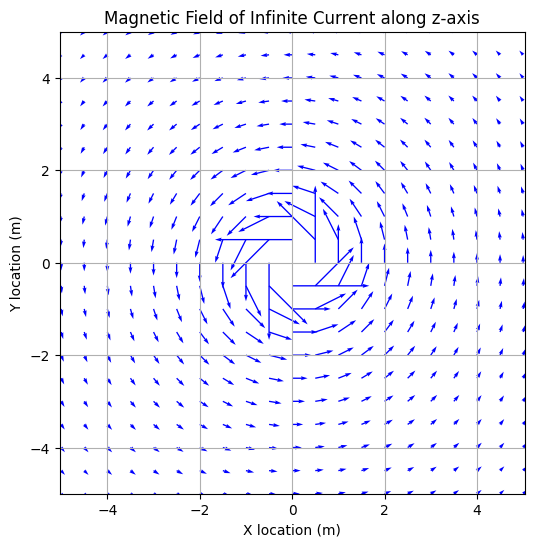

Value of first vector to the right of origin:
 H = 3.183099 A/m


In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parámetros ---
I = 10.0  # Corriente en Amperes
plotlim = [-5, 5, -5, 5]  # límites del gráfico [xmin, xmax, ymin, ymax]

# --- Malla ---
dx = (plotlim[1] - plotlim[0]) / 20
dy = (plotlim[3] - plotlim[2]) / 20
xrange = np.arange(plotlim[0], plotlim[1] + dx, dx)
yrange = np.arange(plotlim[2], plotlim[3] + dy, dy)
X, Y = np.meshgrid(xrange, yrange)

# --- Radio y ángulo ---
R = np.sqrt(X**2 + Y**2)
R[R == 0] = np.nan  # evitar división por cero

# Vectores unitarios en dirección phi (-y, x)
phiX = -Y / R
phiY =  X / R

# --- Campo magnético H = I / (2*pi*r) * phi_hat ---
H = I / (2 * np.pi * R)
U = H * phiX
V = H * phiY

# --- Graficar ---
plt.figure(figsize=(6,6))
plt.quiver(X, Y, U, V, color="blue")
plt.axis("equal")
plt.xlim(plotlim[0], plotlim[1])
plt.ylim(plotlim[2], plotlim[3])
plt.xlabel("X location (m)")
plt.ylabel("Y location (m)")
plt.title("Magnetic Field of Infinite Current along z-axis")
plt.grid(True)
plt.show()

# --- Mostrar valor de referencia ---
print("Value of first vector to the right of origin:")
print(f" H = {I/(2*np.pi*dx):.6f} A/m")
